In [2]:
# import the necessary libraries you need for your analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet


In [3]:
# read in csv file with no encoding
data_students = pd.read_csv("data/students_länder.csv")



In [4]:
data_students.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Germans',
       'Germans.1', 'Germans.2', 'Foreigners', 'Foreigners.1', 'Foreigners.2',
       'Total', 'Total.1', 'Total.2'],
      dtype='object')

In [5]:
# drop columns we don't need
data_students.drop(["Germans","Germans.1","Germans.2", "Foreigners", "Foreigners.1", "Foreigners.2"], axis=1, inplace=True)

In [6]:
#check the current columns
data_students.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Total',
       'Total.1', 'Total.2'],
      dtype='object')

In [7]:
#rename the columns
data_students.rename(columns={'Unnamed: 0': 'semester', 'Unnamed: 1':'federal_state', 'Unnamed: 2':'study_code', 'Unnamed: 3': 'study_subject', 'Total': 'total_males', 'Total.1': 'total_females', 'Total.2': 'total_all'}, inplace=True)

In [8]:
data_students.columns

Index(['semester', 'federal_state', 'study_code', 'study_subject',
       'total_males', 'total_females', 'total_all'],
      dtype='object')

In [9]:
data_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18756 entries, 0 to 18755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   semester       18755 non-null  object
 1   federal_state  18752 non-null  object
 2   study_code     18752 non-null  object
 3   study_subject  18752 non-null  object
 4   total_males    18753 non-null  object
 5   total_females  18753 non-null  object
 6   total_all      18753 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [10]:
data_students.head(5)

,semester,federal_state,study_code,study_subject,total_males,total_females,total_all
0,NaN,NaN,NaN,NaN,Male,Female,Total
1,WT 2018/19,Baden-Württemberg,SF141,Waste Management,-,-,-
2,WT 2018/19,Baden-Württemberg,SF002,African Studies,-,-,-
3,WT 2018/19,Baden-Württemberg,SF138,Agricultural Biology,29,50,79
4,WT 2018/19,Baden-Württemberg,SF125,Agricultural Economics,4,5,9


In [11]:
data_students.replace('-', np.nan, inplace=True)

In [12]:
data_students.head()

,semester,federal_state,study_code,study_subject,total_males,total_females,total_all
0,NaN,NaN,NaN,NaN,Male,Female,Total
1,WT 2018/19,Baden-Württemberg,SF141,Waste Management,NaN,NaN,NaN
2,WT 2018/19,Baden-Württemberg,SF002,African Studies,NaN,NaN,NaN
3,WT 2018/19,Baden-Württemberg,SF138,Agricultural Biology,29,50,79
4,WT 2018/19,Baden-Württemberg,SF125,Agricultural Economics,4,5,9


In [13]:
# drop null values
data_students.dropna(inplace=True)

In [14]:
data_students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330 entries, 3 to 18751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   semester       8330 non-null   object
 1   federal_state  8330 non-null   object
 2   study_code     8330 non-null   object
 3   study_subject  8330 non-null   object
 4   total_males    8330 non-null   object
 5   total_females  8330 non-null   object
 6   total_all      8330 non-null   object
dtypes: object(7)
memory usage: 520.6+ KB


In [15]:
#turn the student numbers into integer
data_students['total_all'] = pd.to_numeric(data_students['total_all'], errors='coerce')
data_students['total_males'] = pd.to_numeric(data_students['total_males'], errors='coerce')
data_students['total_females'] = pd.to_numeric(data_students['total_females'], errors='coerce')

In [16]:
data_students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330 entries, 3 to 18751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   semester       8330 non-null   object
 1   federal_state  8330 non-null   object
 2   study_code     8330 non-null   object
 3   study_subject  8330 non-null   object
 4   total_males    8330 non-null   int64 
 5   total_females  8330 non-null   int64 
 6   total_all      8330 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 520.6+ KB


In [17]:
data_students['semester'].unique()

array(['WT 2018/19', 'WT 2019/20', 'WT 2020/21', 'WT 2021/22'],
      dtype=object)

In [18]:
data_students['federal_state'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [19]:
#rename federal states in English
data_students.replace('Nordrhein-Westfalen', 'North Rhein-Westphalia', inplace=True)
data_students.replace('Niedersachsen', 'Lower Saxony', inplace=True)
data_students.replace('Sachsen', 'Saxony', inplace=True)
data_students.replace('Sachsen-Anhalt', 'Saxony-Anhalt', inplace=True)

In [20]:
data_students['federal_state'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Lower Saxony',
       'North Rhein-Westphalia', 'Rheinland-Pfalz', 'Saarland', 'Saxony',
       'Saxony-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [ ]:
data_students.to_csv('data/data_students.csv', index= False)

In [22]:
#create new data frames for each semester
students_18= data_students[data_students['semester'] == 'WT 2018/19']
students_19 = data_students[data_students['semester'] == 'WT 2019/20']
students_20 = data_students[data_students['semester'] == 'WT 2020/21']
students_21 = data_students[data_students['semester'] == 'WT 2021/22']

In [23]:
students_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 3 to 4687
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   semester       2078 non-null   object
 1   federal_state  2078 non-null   object
 2   study_code     2078 non-null   object
 3   study_subject  2078 non-null   object
 4   total_males    2078 non-null   int64 
 5   total_females  2078 non-null   int64 
 6   total_all      2078 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 129.9+ KB


In [24]:
#understand the data
students_18[['federal_state', 'total_males', 'total_females', 'total_all']].describe()

,total_males,total_females,total_all
count,2078.000000,2078.000000,2078.000000
mean,102.236285,107.167950,209.404235
std,285.599847,261.400733,498.351492
min,1.000000,1.000000,2.000000
25%,9.000000,11.000000,25.000000
50%,26.000000,32.000000,63.500000
75%,75.000000,93.000000,177.000000
max,4173.000000,4430.000000,7996.000000


In [25]:
students_18['study_subject'].nunique()

265

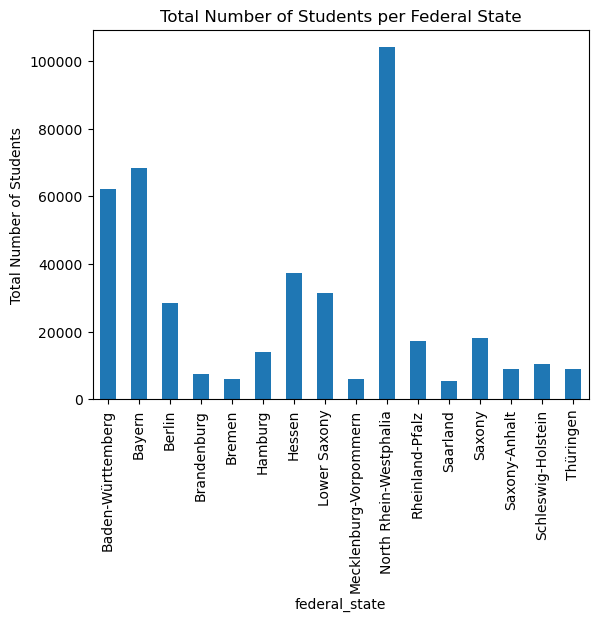

In [26]:
# Group data by 'federal_state' and sum the values of 'total_all' for each group
grouped = students_18.groupby('federal_state')['total_all'].sum()

# Plot the grouped data as a bar graph
grouped.plot.bar()

# Add a title and label for the y-axis
plt.title("Total Number of Students per Federal State")
plt.ylabel("Total Number of Students")

# Show the graph
plt.show()




In [27]:
students_18_NRW = students_18[students_18['federal_state'] == 'Nordrhein-Westfalen']


In [29]:
data_students['study_subject'].nunique()

269

In [148]:
#create a new csv file
students_18.to_csv('data/students_18.csv', index= False)
students_19.to_csv('data/students_19.csv', index= False)
students_20.to_csv('data/students_20.csv', index= False)
students_21.to_csv('data/students_21.csv', index= False)